In [2]:
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd
from scipy.optimize import curve_fit
from math import e
ln = np.log  

In [3]:
plt.style.use(['science', 'notebook', 'grid'])

In [6]:
data=pd.read_csv("C:/Users/brint/Documents/GitHub/GS_RR/data - Copy.csv")

In [7]:
data

,Mesh size (mm),Cumulative % weight passing
0,250,99.96
1,180,97.20
2,125,71.62
3,90,48.91
4,63,29.82
5,45,18.21


In [8]:
np_arr=data.values
x_data= np_arr[:,0]
y_data= np_arr[:,1]

In [9]:
x_data

array([250., 180., 125.,  90.,  63.,  45.])

In [10]:
y_data

array([99.96, 97.2 , 71.62, 48.91, 29.82, 18.21])

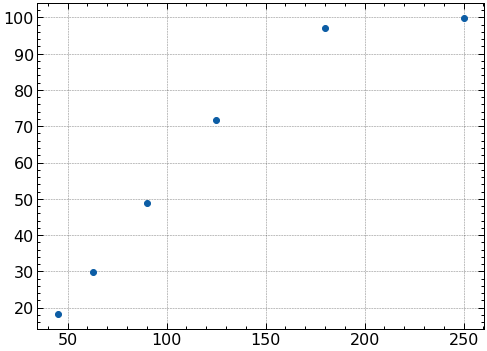

In [11]:
plt.scatter(x_data,y_data)
plt.show()

**GGS estimation

In [12]:
# https://docs.scipy.org/doc/scipy/reference/generated/scipy.optimize.curve_fit.html
def GGS(x,a,k):
    return ((x/k)**a)

In [13]:
popt,pcov=curve_fit(GGS,x_data,y_data,p0=[15,1.5],maxfev=5000)

C:\CONDA_~1/ipykernel_8048/675661907.py:3: RuntimeWarning: invalid value encountered in power
  return ((x/k)**a)


In [14]:
popt

array([0.80952097, 0.74866806])

In [15]:
pcov

array([[0.02030189, 0.10193319],
       [0.10193319, 0.51541764]])

In [16]:
a_opt,k_opt =popt
x_model=np.linspace(min(x_data),max(x_data),500)
y_model=GGS(x_model,a_opt,k_opt)

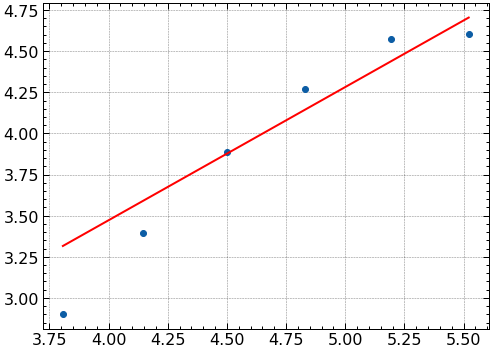

In [21]:
plt.scatter(ln(x_data),ln(y_data))
plt.plot(ln(x_model),ln(y_model),color='r')
plt.show()

In [22]:
# Optimal values for the parameters so that the sum of the squared residuals of f(xdata, *popt) - ydata is minimized.
popt

array([0.80952097, 0.74866806])

In [23]:
# The estimated covariance of popt. The diagonals provide the variance of the parameter estimate.
pcov

array([[0.02030189, 0.10193319],
       [0.10193319, 0.51541764]])

In [24]:
# To compute one standard deviation errors on the parameters use 
perr = np.sqrt(np.diag(pcov))
perr

array([0.14248468, 0.71792593])

**RR estimation

In [25]:
# https://docs.scipy.org/doc/scipy/reference/generated/scipy.optimize.curve_fit.html
def RR(x,m,k):
    return np.exp((x/k)**m)

In [26]:
popt_2,pcov_2=curve_fit(RR,x_data,y_data,maxfev=1000)

C:\CONDA_~1/ipykernel_8048/2663461354.py:3: RuntimeWarning: invalid value encountered in power
  return np.exp((x/k)**m)


In [27]:
popt_2

array([0.18915024, 0.06955531])

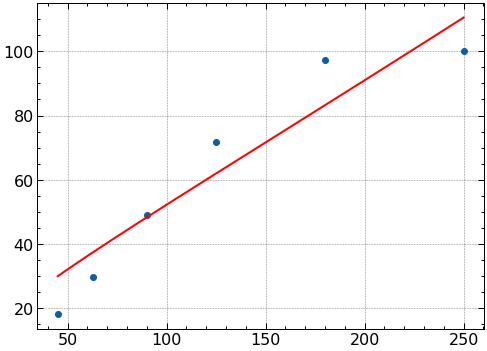

In [41]:
a_opt,k_opt =popt_2
x_model_2=np.linspace(min(x_data),max(x_data),500)
y_model_2=RR(x_model,a_opt,k_opt)
plt.scatter(x_data,y_data)
plt.plot(x_model_2,y_model_2,color='r')
plt.show()

In [40]:
perr_2 = np.sqrt(np.diag(pcov_2))
perr_2

array([0.03966738, 0.11498402])